<img src='../../media/common/LogoWekeo_Copernicus_RGB_0.png' align='left' height='96px'></img>

<hr>

# Analyzing Wet Snow Extent from SWS Time Series Based on Altitude and Local Aspect

This document includes scripts designed for the analysis of downloaded and extracted data on the local disk of a user.

This script is specifically developed to analyze the extent of wet snow from SWS time series data, considering factors such as altitude and local aspect. By using this script, users can gain valuable insights into the spatial and temporal patterns of wet snow distribution, which are crucial for various environmental and climatic studies.

## Environment Setup
Before we begin, we need to prepare our environment by installing and importing the necessary Python libraries.

### Load Required Libraries

***
Most of the following modules are standard Python modules (tested with Python version 3.7.11, <a href="https://github.com/python/cpython/blob/3.7/LICENSE" target="_blank">License</a>):

*Included Python Modules:*  
- os : Miscellaneous operating system interfaces
- math : Mathematical functions
- glob : Unix style pathname pattern expansion

*Included Python Packages:*
- <a href="https://gdal.org/api/python.html" target="_blank">gdal</a> (version 3.0.2)<br> 
<span style="margin-left:3%;">Tools for programming and manipulating the GDAL (Geospatial Data Abstraction Library). <b>License type:</b> MIT style <a href="https://github.com/OSGeo/gdal/blob/master/LICENSE.TXT" target="_blank">License</a></span><br>
- <a href="https://numpy.org/" target="_blank">numpy</a> (version 1.21.5)<br>
<span style="margin-left:3%;">NumPy is the fundamental package for array computing with Python. <b>License type:</b> BSD <a href="https://www.cgl.ucsf.edu/chimerax/docs/licenses/numpy-LICENSE.txt" target="_blank">License</a></span>
- <a href="https://matplotlib.org/" target="_blank">matplotlib</a> (version 3.5.1)<br>
<span style="margin-left:3%;">Python plotting package. <b>License type:</b> Python Software Foundation <a href="https://www.cgl.ucsf.edu/chimerax/docs/licenses/matplotlib-LICENSE_QT4_EDITOR.txt" target="_blank">License</a></span>
- <a href="https://pandas.pydata.org/" target="_blank">pandas</a> (version 1.3.5)<br>
<span style="margin-left:3%;">Python Data Analysis Library. <b>License type:</b> New BSD <a href="https://pandas.pydata.org/docs/getting_started/overview.html#license" target="_blank">License</a></span>
- <a href="https://github.com/python-windrose/windrose.git" target="_blank">windrose</a> (version 1.6.8)<br>
<span style="margin-left:3%;">Python library to manage wind data, draw windroses (also known as polar rose plots), and fit Weibull probability density functions.<br></span><span style="margin-left:3%;"><b>License type:</b> <a href="https://github.com/python-windrose/windrose/blob/master/LICENCE_CECILL-B.TXT" target="_blank">CECILL-B</a> and <a href="https://github.com/python-windrose/windrose/blob/master/LICENCE_BSD-3-Clause.TXT" target="_blank">BSD-3-Clause</a></span>

In [32]:
import os
import math
import glob

import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from windrose import WindroseAxes

## Functions

#### Function to Open and Read GeoTIFF Files Assuming Extracted Products from the Catalog

In [ ]:
def readTif(file_tif):

    ds = gdal.Open(file_tif)
   # Projection
    proj = ds.GetProjection()
    # Dimensions
    width = ds.RasterXSize
    height = ds.RasterYSize
    # Number of bands
    count = ds.RasterCount
    # Metadata for the raster dataset
    meta = ds.GetMetadata()
    data = ds.ReadAsArray()
    ds = None
    return data, width, height, count, meta, proj

#### Function to Calculate Aspect from a Digital Elevation Model

In [ ]:
def aspect(z):
    """Calculate aspect from DEM."""
    x, y = np.gradient(z)
    return np.arctan2(-x, y)

## Usage

<font color='red'>Enter a valid path and file names into the following box. These are mandatory as input for all following steps:</font>
***

#### <font color='#0080FF'>"path_input"</font>: Enter local path on your machine where products are stored. 
<table><tr><td>
Note: If you copy/paste the path from a windows explorer, add an <b>"r"</b> before the string to interpret backslashes as slashes, as shown in the example below. If your path contains already slashes, remove the <b>"r"</b> in the beginning of the string.
</td></tr></table>

#### <font color='#0080FF'> "files_wsm"</font>: Define the wet snow product file names to be loaded. 
<table><tr><td>
Note: In the template, all files starting with <b>'SWS_'</b> and ending with <b>'_WSM.tif'</b> are searched.
</td></tr></table>

#### <font color='#0080FF'> "file_elev"</font>: Define the digital elevation model file name with the same geometry as the SWS products to be used for the analysis.

<table><tr><td>
Note: In this template, the DEM file name must include <b>"DEM_60m"</b> and extension should be <b>".tif"</b>, and must be stored in the same directory as the SWS products.
</td></tr></table>

In [35]:
path_input =  r"SWS"
files_wsm = glob.glob(os.path.join(path_input, "SWS_*_WSM.tif"))
file_elev = glob.glob(os.path.join(path_input, "*DEM_60m*.tif"))

#### Open and Read the DEM File Using the Function Defined in Box [2]:

In [36]:
elev_data = readTif(file_elev[0])[0]

#### Calculate the aspect from the DEM using the function defined in Box [3], and plot the resulting layer.
<table><tr><td>
Note: aspect calculation in the function provides the aspect in radians. For the illustration with the windrose toolbox, aspect information must be converted to degress, scaled between 0 and 360°. So, an offset of 180° is added to the conversion formula to rescale values from range [-180, 180] to [0, 360].
</td></tr></table>

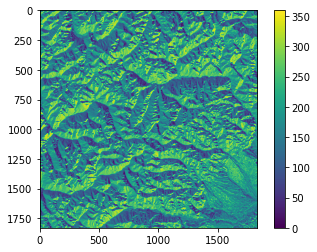

In [37]:
asp_data = aspect(elev_data)
aspdeg = (180./np.pi)*asp_data+180. # convert to degrees
plt.imshow(aspdeg)
plt.colorbar()

#### Open and read all Wet Snow products for the Mountains using the function defined in Box [2]:

In [38]:
wsm_datas = []
for file_wsm in files_wsm:
    wsm_datas.append(readTif(file_wsm)[0])

#### Extract the aspect and elevation information for wet snow pixels and add this data to a pandas DataFrame for each SWS product in the time series:
<table><tr><td>
Note: You can activate <b>maxelev</b>, <b>minelev</b>, and <b>elevrange</b> if needed to obtain the minimum and maximum elevation, as well as the elevation range of the selected scene.
</td></tr></table>

elevation      aspect
0            1968  199.440035
1            2005  243.434949
2            2015  237.652557
3            2024  230.527540
4            2043  229.969741
...           ...         ...
290710       1782  270.734521
290711       1751  273.972496
290712       1574  310.236358
290713       1543  298.610460
290714       1499  291.595310

[290715 rows x 2 columns]

elevation      aspect
0            1746  217.303948
1            1750   84.957549
2            1749  197.744672
3            1758   90.000000
4            1749   46.847610
...           ...         ...
477967       2318  299.357754
477968       2280  298.810794
477969       2269  302.905243
477970       1555  295.709954
477971       1543  298.610460

[477972 rows x 2 columns]

elevation      aspect
0            1746  217.303948
1            1752  104.036243
2            1750   84.957549
3            1749  197.744672
4            1758   90.000000
...           ...         ...
452657       2336  215.537678
452658       2484  258.518009
452659       2541  191.888658
452660       2501  121.701430
452661       2280  298.810794

[452662 rows x 2 columns]

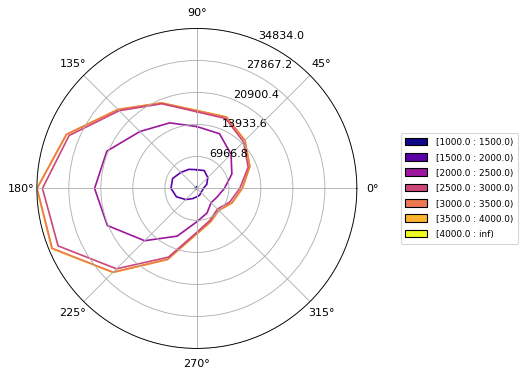

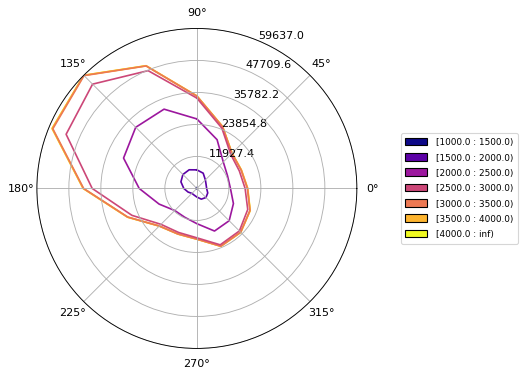

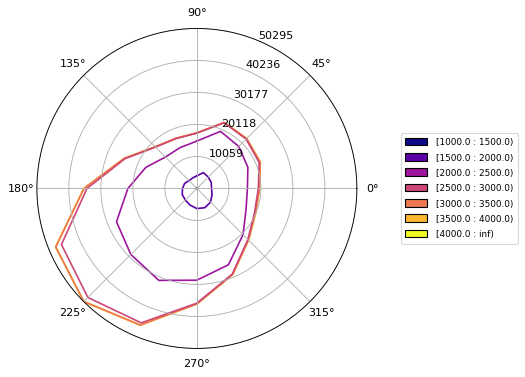

In [39]:
val_wet_snow = 110

for wsm_data in wsm_datas:
    dataframe_list = []
    
    sel = (wsm_data == val_wet_snow)
    elev_sel = elev_data[sel]
    #maxelev = int(np.max(np.round(elev_sel/100)*100))
    #minelev = math.floor(np.min(elev_sel/100))*100
    #elevrange = int(np.round((maxelev - minelev)/100)*100)
    #print(minelev, maxelev, elevrange)
    
    asp_sel = aspdeg[sel]
    
    df = pd.DataFrame({"elevation": elev_sel, "aspect": asp_sel})
    dataframe_list.append(df)
    
    ax = WindroseAxes.from_ax(rect=[0,0,0.5,0.5])
    # display datasets
    for df in dataframe_list:
        display(df)
        ax.contour(df.aspect, df.elevation, bins=np.arange(1000, 4500, 500), cmap=cm.plasma)
        ax.set_legend(loc='right', bbox_to_anchor=(1.5,0.5))

***
><span style = "font-family:Verdana; font-size:0.7em">Copyright © <font color='darkblue'>2022</font>, by ENVEO IT GmbH.</span>  
<span style = "font-family:Verdana; font-size:0.7em">Contributors: Gabriele Schwaizer, Lars Keuris</span>  
<span style = "font-family:Verdana; font-size:0.7em">URL: www.enveo.at</span> 
***
<p style = "font-family:Verdana; font-size:0.7em; line-height:0.5">Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files, to use the Software without restriction.</p>  
<p style = "font-family:Verdana; font-size:0.7em; line-height:1.15; text-align:justify">THE SOFTWARE IS PROVIDED AS IS, WITHOUT WARRANTY OF ANYKIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. <b>IN NO EVENT SHALL THE COPYRIGHT HOLDER BE LIABLE FOR ANY CLAIM, DIRECT INDIRECT, SPECIAL, INCIDENTAL, OR CONSEQUENTIAL DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.</b></p>

*** 